# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import numpy as np
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [7]:
def calc_slope(xs,ys):
    meanx = np.array(xs).mean()
    meany = np.array(ys).mean()
    xtimesy = []
    xsquared = []
    for i in range(len(xs)):
        xtimesy.append(xs[i]*ys[i])
    meanxy = np.array(xtimesy).mean()
    for x in xs:
        xsquared.append(x**2)
    meanxsquared = np.array(xsquared).mean()
    return ((meanx*meany) - meanxy)/ (((meanx)**2) - meanxsquared)

def best_fit(xs,ys):
    slope = calc_slope(xs,ys)
    intercept = np.array(ys).mean() - (slope*(np.array(xs).mean()))
    return slope, intercept

def reg_line (m, b, xs):
    yguess = []
    for x in xs:
        yguess.append(m*x + b)
    return yguess

def sq_err(ys_a, ys_b):
    differences = []
    for i in range(len(ys_a)):
        differences.append((ys_a[i] - ys_b[i])**2)
    return np.array(differences).sum()

def r_squared(ys_real, ys_predicted):
    ymean = ys_real.mean()
    ymeanline = np.array([ymean]*len(ys_real))
    SSE = sq_err(ys_real, ys_predicted)
    SST = sq_err(ys_real, ymeanline)
    rsquared = 1 - (SSE/SST) 
    return rsquared


In [13]:
def run_regression(xs, ys):
    m,b = best_fit(xs, ys)
    yguess = reg_line(m, b, xs)
    rsquared = r_squared(ys, yguess)
    plt.scatter(xs,ys, c="blue", label='Data')
    plt.plot(xs,yguess, c="red", label='Regression Line')
    plt.legend()
    print('''
    Basic Regression Diagnostics
    ----------------------------
    Slope: %f
    Y-Intercept: %f
    R-Squared: %f
    ----------------------------
    Model: Y = %f * X + %f''' % (m, b, rsquared, m, b))
    return(m,b)


    Basic Regression Diagnostics
    ----------------------------
    Slope: 0.557576
    Y-Intercept: 6.333333
    R-Squared: 0.971534
    ----------------------------
    Model: Y = 0.557576 * X + 6.333333


(0.5575757575757568, 6.3333333333333375)

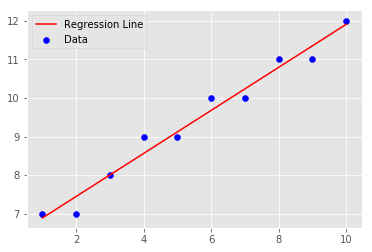

In [14]:
run_regression(X,Y)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


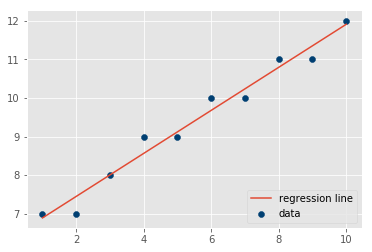

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.


    Basic Regression Diagnostics
    ----------------------------
    Slope: 0.557576
    Y-Intercept: 6.333333
    R-Squared: 0.971534
    ----------------------------
    Model: Y = 0.557576 * X + 6.333333


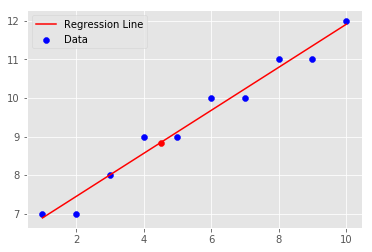

In [23]:
m, b = run_regression(X,Y)
newguess = reg_line(m, b, [4.5])

plt.scatter([4.5], newguess, c='red')

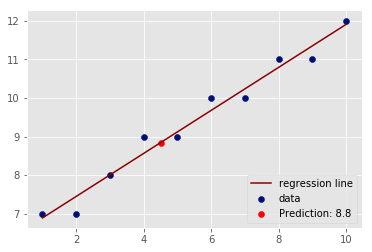

## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 